# Ejercicio

* Usaremos una base de datos de reconocimiento de actividad humana proveniente de sensores de los smart-phones
   * Se creó a partir de las grabaciones de los participantes del estudio que realizan actividades de la vida diaria (ADL)
   * El objetivo es clasificar las actividades en una de las seis actividades (caminar, subir escaleras, bajar escaleras, sentarse, pararse y acostarse) realizadas.
* El dataset está disponible en la web de [Kaggle](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones), pero estará descargado en el directorio *datasets* con el nombre de [Human_Activity_Recognition_Using_Smartphones_Data.csv](datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv)

* Para cada registro en el conjunto de datos se proporciona:
   * Aceleración 3D del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
   * Velocidad angular 3D del giroscopio.
   * Un vector de 561 características con variables de dominio de tiempo y frecuencia.
   * La etiqueta de actividad
* Más información sobre las funciones está disponible en [la web](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones)

## Apredizaje supervisado
* Visión general de los algoritmos supervisados 

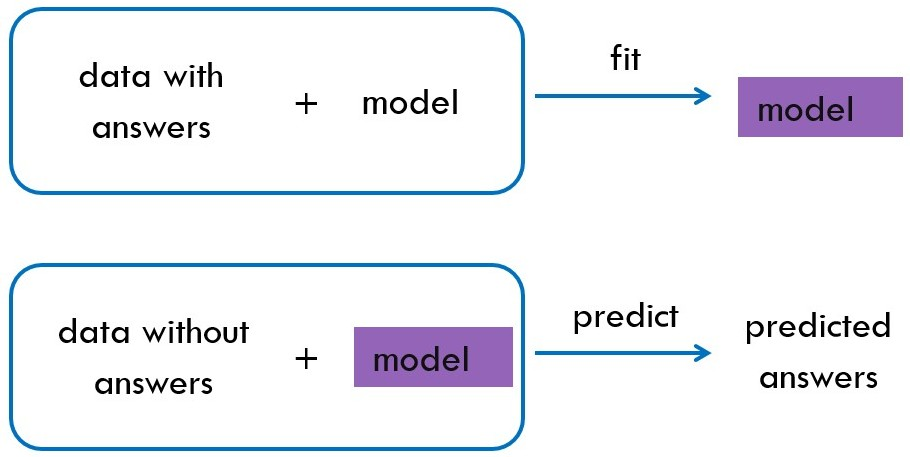

* Los algoritmos como **Regresión Lineal** permiten conocer respuestas numéricas (valores continuos) 
    * Ej: Predecir ingresos de un película
    



## Regresión lineal 
* Ajustar el modelo a una función matemática $y_\beta(x) = \beta_0+\beta_1 x+\epsilon$ que es una **recta**
   * Para el ejemplo $y_\beta$ representa los ingresos de taquilla y $x$ el presupuesto
   
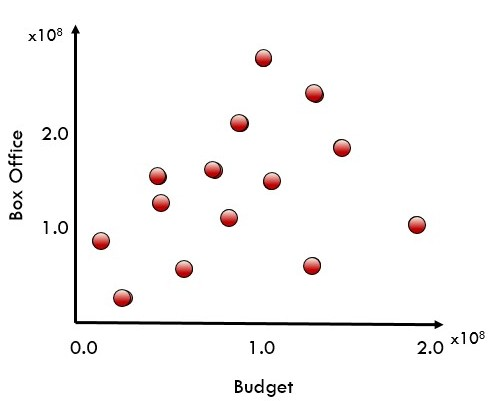

   * El ajuste linear depende de la minimización del error cometido $y_\beta(x_{obs}) - y_{obs}$
   * Existen múltiples métricas: error cuadrático medio (MSE), función de coste...
   
   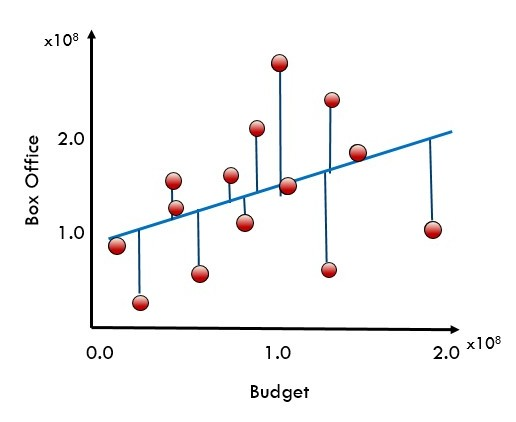

* La invocación del método de [regresión lineal se puede realizar haciendo uso de la librería scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

```
from sklearn.linear_model import LinearRegression

....
# Create an instance of the class​
LR = LinearRegression()​
# Fit the instance on the data and then predict the expected value​
LR = LR.fit(X_train, y_train)​
y_predict = LR.predict(X_test)

```

## Preparación del dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Carga de datos
data = pd.read_csv('datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv') 

In [ ]:
data.head()

In [ ]:
#subdata = data[['angle(X,gravityMean)','angle(Y,gravityMean)','angle(Y,gravityMean)','subject']]
## Select all columns except the last one because the last one is the target
subdata = data.iloc[:, :-1]


In [ ]:
subdata.head()


In [ ]:
x = subdata.iloc[:,:-1] # Remove "Subject"

# Label as number not as string
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)

y = data['Activity']


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

In [ ]:
from sklearn.linear_model import LinearRegression

import time

start_time = time.time()
# Create an instance of the class
LR = LinearRegression()
# Fit the instance on the data and then predict the expected value
LR = LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)
unpatched_time = time.time() - start_time
print("Time to calculate \033[1m lr.predict in UNpatched scikit-learn {:4.1f}\033[0m seconds".format(unpatched_time))


In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_predict)

print('MSE Linear Regression=', MSE)

# ToDo
* Como desarrollo a realizar consiste en utilizar el método de **Regresión Logistica** en lugar de Regresión Linear
* Evaluar la mejora de precisión con la métrica MSE
* Posible mejoras haciendo uso de las Extensiones como "[Intel® Extension for Scikit-learn"](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd)

## Regresión lineal como clasificador
* Veamos un ejemplo de utilización del método de regresión para clasificar el número de pacientes "recuperados"/"fallecidos" después de cinco años
    * Para ello podemos entrenar el modelo y ajustar una función matemática $y_\beta(x) = \beta_0+\beta_1 x+\epsilon$ que es una **recta**

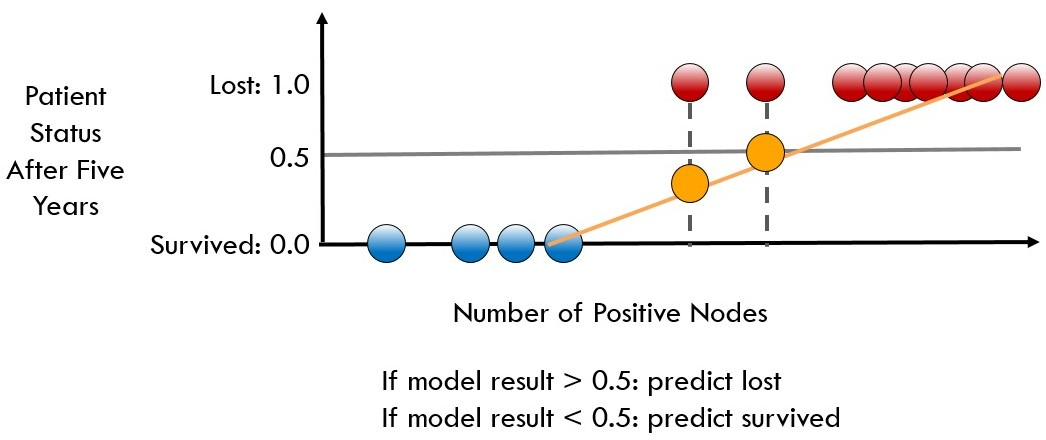

### Problemas
* Sin embargo parece que no se comporta muy bien
    * Si como clasificador suponemos:
         * Valores predichos>0.5 "fallecen" 
         * Valores predichos<0.5 "sobreviven"
         


## Introducción a regresión logística
* Sería más adecuado utilizar otra función matemática que **limite mejor la decisión**
    * Una función matemática que pueda asemejarse a una función **sigmoide**: $y=\frac{1 }{1+e^{-x}}$
    * La función más adecuada se puede expresar como $y_\beta(x)=\frac{1 }{1+e^{-(\beta_0+\beta_1 x+\epsilon)}}$
     
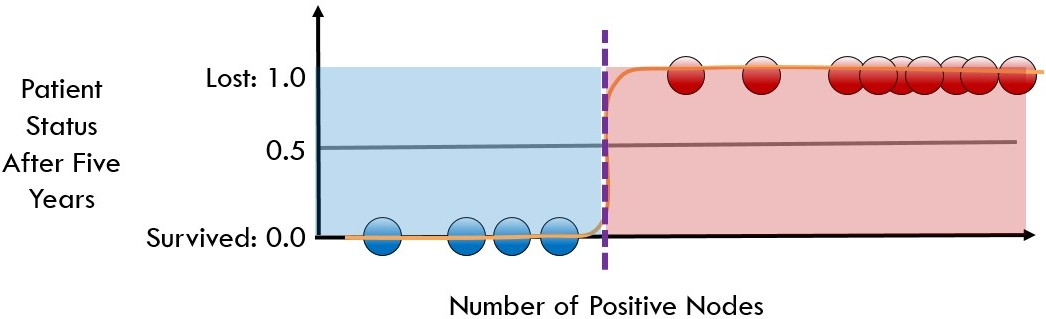

## Ejercicio propuesto
* Desarrollar la clasificación del dataset [Human_Activity_Recognition_Using_Smartphones_Data.csv](datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv) empleando la [Regresión Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* Evaluar la mejora de precisión con la métrica MSE
* Posible mejoras haciendo uso de las Extensiones como "[Intel® Extension for Scikit-learn"](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd)